problem 1

https://www.tensorflow.org/tutorials/images/cnn

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras import datasets, layers, models

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Model compilation and training

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5


C:\Users\SAHR\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 638s 337ms/step - loss: 0.1496 - accuracy: 0.9545 - val_loss: 0.0505 - val_accuracy: 0.9841
Epoch 2/5
1875/1875 [==============================] - 677s 361ms/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.0414 - val_accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 662s 353ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0274 - val_accuracy: 0.9917
Epoch 4/5
1875/1875 [==============================] - 721s 384ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0342 - val_accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 761s 406ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0288 - val_accuracy: 0.9904


In [11]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# model.fit(train_images, train_labels, epochs=5)

Evaluate the model

313/313 - 42s - loss: 0.0288 - accuracy: 0.9904


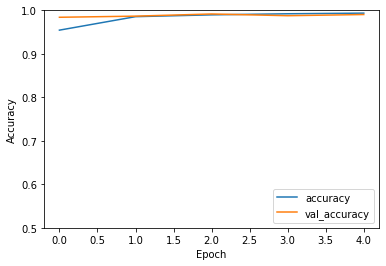

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc)

0.9904000163078308


Problem 3

In [15]:
import numpy as np
import pandas as pd
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [16]:
K.clear_session( )

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [19]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/10
7/7 [==============================] - 16s 236ms/step - loss: 0.7321 - accuracy: 0.6094 - val_loss: 0.5497 - val_accuracy: 0.5625
Epoch 2/10
7/7 [==============================] - 0s 67ms/step - loss: 0.4317 - accuracy: 0.8125 - val_loss: 0.3148 - val_accuracy: 0.8750
Epoch 3/10
7/7 [==============================] - 0s 41ms/step - loss: 0.2792 - accuracy: 0.9375 - val_loss: 0.2090 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 0s 46ms/step - loss: 0.1984 - accuracy: 0.9531 - val_loss: 0.1714 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 50ms/step - loss: 0.1477 - accuracy: 0.9531 - val_loss: 0.1007 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 50ms/step - loss: 0.1050 - accuracy: 1.0000 - val_loss: 0.1264 - val_accuracy: 0.9375
Epoch 7/10
7/7 [==============================] - 0s 55ms/step - loss: 0.1167 - accuracy: 0.9375 - val_loss: 0.0924 - val_accuracy: 0.9375
Epoch 8/10
7/7 [=========

In [20]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)
print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

y_pred_proba [2.7986765e-03 9.9939585e-01 1.3647377e-03 9.9984735e-01 9.3146831e-01
 9.9952519e-01 8.6823225e-02 7.7091044e-01 9.9984884e-01 9.7148490e-01
 9.9719864e-01 9.9819273e-01 9.9970561e-01 2.8401256e-02 1.7288327e-04
 8.1646442e-04 5.3790319e-01 9.8543569e-05 9.5273107e-01 4.0969253e-04]
y_pred [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]
y_test [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


In [21]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.21577921509742737
Train accuracy: 0.8999999761581421


Problen 4

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int)[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train)
y_val_one_hot = enc.transform(y_val)
y_test_one_hot = enc.transform(y_test)

In [24]:
K.clear_session( )
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(4,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(3, activation = tf.nn.softmax))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_one_hot,
                    batch_size=10,
                    epochs=10,
                    verbose=0,
                    validation_data=(X_val, y_val_one_hot))

In [27]:
y_pred_proba = model.predict(X_test)[:, 0]
y_pred = np.where(y_pred_proba >0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

y_pred_proba [4.5540985e-10 1.0033697e-03 9.9992871e-01 9.0828083e-09 9.9888748e-01
 1.4454493e-11 9.9948895e-01 2.9390227e-04 1.3328160e-04 2.0150731e-03
 2.1209560e-07 6.7770260e-04 2.8473118e-04 1.7001365e-04 1.9303027e-04
 9.9774808e-01 2.6110321e-04 3.5658391e-04 9.9685991e-01 9.9982327e-01
 6.4560396e-08 2.7162622e-04 9.9556869e-01 9.9617189e-01 1.4305311e-05
 9.9987161e-01 9.9811989e-01 1.0280719e-03 9.5586181e-03 9.9777716e-01]
y_pred [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [28]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred)
print('y_test', y_test.ravel())

y_pred [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [29]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.03405049815773964
Train accuracy: 1.0


problem 5

In [30]:
from sklearn.preprocessing import StandardScaler

train = pd.read_csv('train.csv')

x = train[['GrLivArea', 'YearBuilt']]
y = train[['SalePrice']]

x = np.log(x).values
y = np.log(y).values

sc = StandardScaler()
sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [31]:
K.clear_session( )

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(2,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________


In [34]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(loss='mse',
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=['mse'])
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=20,
                    verbose=1,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/20
94/94 [==============================] - 6s 30ms/step - loss: 4.6977 - mse: 4.6977 - val_loss: 0.0729 - val_mse: 0.0729 loss: 4.7678 - mse: 4.76
Epoch 2/20
94/94 [==============================] - 2s 22ms/step - loss: 0.0767 - mse: 0.0767 - val_loss: 0.0902 - val_mse: 0.0902
Epoch 3/20
94/94 [==============================] - 2s 22ms/step - loss: 0.0813 - mse: 0.0813 - val_loss: 0.0733 - val_mse: 0.0733
Epoch 4/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0774 - mse: 0.0774 - val_loss: 0.1096 - val_mse: 0.1096A: 0s - loss: 0.0775 - mse: 
Epoch 5/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0863 - mse: 0.0863 - val_loss: 0.1205 - val_mse: 0.1205
Epoch 6/20
94/94 [==============================] - 2s 19ms/step - loss: 0.0923 - mse: 0.0923 - val_loss: 0.0708 - val_mse: 0.0708
Epoch 7/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0831 - mse: 0.0831 - val_loss: 0.0733 - val_mse: 0.0733 0s - loss: 0.0707 -


In [35]:
y_pred_proba = model.predict(X_test)
y_pred = y_pred_proba
print("y_pred", y_pred.ravel()[:5])
print('y_test', y_test.ravel()[:5])

y_pred [12.546217 12.133888 11.900653 12.363333 11.823989]
y_test [12.20918779 11.79810441 11.60823564 12.16525065 11.38509209]


In [36]:
score = model.evaluate(X_test, y_test, verbose=0)
print('loss (test):', score[0])
print('Mean Squared Error (test):', score[1])

loss (test): 0.07019147276878357
Mean Squared Error (test): 0.07019147276878357


problem 6

In [37]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

In [38]:
K.clear_session( )

In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation = tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot,
                    batch_size=20,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_val, y_val_one_hot))

Epoch 1/5
2400/2400 [==============================] - 64s 18ms/step - loss: 0.2884 - accuracy: 0.9143 - val_loss: 0.2106 - val_accuracy: 0.9369
Epoch 2/5
2400/2400 [==============================] - 32s 13ms/step - loss: 0.1857 - accuracy: 0.9482 - val_loss: 0.1853 - val_accuracy: 0.9505
Epoch 3/5
2400/2400 [==============================] - 31s 13ms/step - loss: 0.1554 - accuracy: 0.9550 - val_loss: 0.1733 - val_accuracy: 0.9531
Epoch 4/5
2400/2400 [==============================] - 40s 16ms/step - loss: 0.1398 - accuracy: 0.9604 - val_loss: 0.1957 - val_accuracy: 0.9503s: 0.1396 
Epoch 5/5
2400/2400 [==============================] - 36s 15ms/step - loss: 0.1340 - accuracy: 0.9625 - val_loss: 0.1609 - val_accuracy: 0.9599


In [42]:
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print("y_pred", y_pred[:10])
print('y_test', y_test.ravel()[:10])

y_pred [7 2 1 0 4 1 4 9 6 9]
y_test [7 2 1 0 4 1 4 9 5 9]


In [43]:
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16596029698848724
Test accuracy: 0.958899974822998
